In [ ]:
## Importing libraries
import boto3
import pandas as pd
import numpy as np
from random import sample
from sklearn.preprocessing import Imputer
pd.set_option('display.max_columns', 200)


## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'evan-callaghan-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Kaggle-American-Express-Default/amex_sample_submission.csv'
file_key2 = 'Kaggle-American-Express-Default/amex_train_labels.csv'
file_key3 = 'Kaggle-American-Express-Default/amex_train_data.csv'
file_key4 = 'Kaggle-American-Express-Default/amex_test_data.csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)
bucket_object3 = bucket.Object(file_key3)
bucket_object4 = bucket.Object(file_key4)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()
file_object3 = bucket_object3.get()
file_object4 = bucket_object4.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')
file_content_stream3 = file_object3.get('Body')
file_content_stream4 = file_object4.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading the data
sample_submission = pd.read_csv(file_content_stream)
train_labels = pd.read_csv(file_content_stream2)
train = pd.read_csv(file_content_stream3, dtype = dtype_dict)
#test = pd.read_csv(file_content_stream4)

In [ ]:
train.head()

In [ ]:
## Builidng a subset of the training data-frame with 100 randomly sampled customers
list1 = set(train['customer_ID'].unique())
sample = sample(list1, 100)

## Subsetting the data
train_sample = train[np.isin(train['customer_ID'], sample)]
train_labels_sample = train_labels[np.isin(train_labels['customer_ID'], sample)]

## Printing the shape of the resulting data-frame
train_sample.shape

Coefficient: [[9.85199602e-20]]


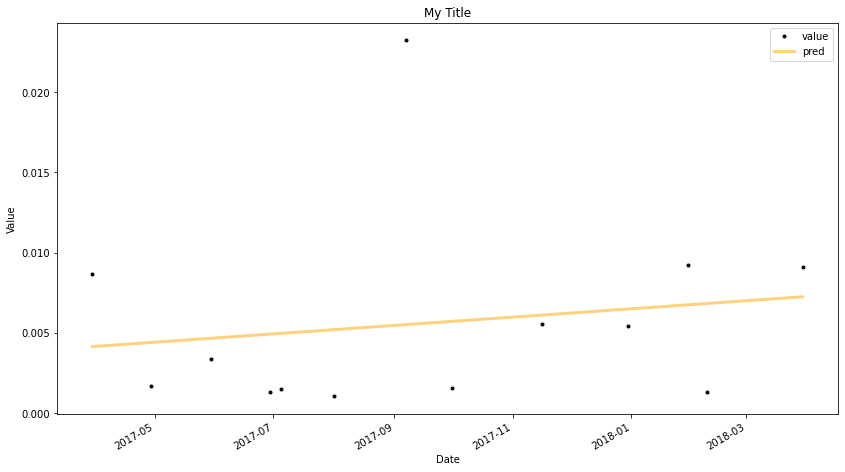

In [114]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Creating a subset of the training data
sub = train_sample[train_sample['customer_ID'] == '04305420dfcc6bae8a5943fde9b19a8beff5456e529a0e6bce15655d9b814329']

## Defining the input and target variables
X = np.asarray(sub['S_2'])
Y = np.asarray(sub['S_5'])

## Cleaning the date variable
df = pd.DataFrame({'time': X, 'value': Y})
df.time = pd.to_datetime(df.time)

## Fitting a linear regression line
lm_md = LinearRegression().fit(df.time.values.reshape(-1, 1), df['value'].values.reshape(-1, 1)) 

## Extracting the linear model coefficients
print('Coefficient:', lm_md.coef_)

## Predicting on the train set
y_pred = lm_md.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

## Plotting results
ax = df.plot(x='time', y='value', color='black', style='.', figsize = ([14, 8]))
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('My Title')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.show()

In [115]:
train_labels[train_labels['customer_ID'] == '04305420dfcc6bae8a5943fde9b19a8beff5456e529a0e6bce15655d9b814329']

,customer_ID,target
7492,04305420dfcc6bae8a5943fde9b19a8beff5456e529a0e...,1


In [ ]:
## Defining a list of all customer_IDs
customers = train_samples['customer_ID'].unique()

## Initialzing new column in the train_labels_sample data-frame
train_labels_sample['Spend_Slope'] = np.nan

## Looping through each set of customers:
for customer in customers:
    
    ## Subsetting by customer
    customers_temp = train_sample[train_sample['customer_ID'] == customer]
    
    ## Spend variable subset
    spend_temp = customer_temp[['S_2', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9','S_11', 'S_12', 'S_13', 'S_15', 'S_16', 
                                'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]
    
    ## Defining the input and target variables
    X = spend_temp['S_2']
    Y = spend_temp.drop(columns = ['S_2'])
    
    ## Creating the linear regression model
    lm_md = LinearRegression().fit(X, Y)
    
    ## Extracting the slope of the line
    slope = lm_md.coef_
    
    ## Creating new variable for spend slope
    train_labels_sample['Spend_Slope'] = np.where(train_labels_sample['customer_ID'] == customer, slope, train_labels_sample['Spend_Slope'])
    
    

## Idea:
Create subsets on customer_ID and create a simple linear regression model to extract the slope of the line

Useful for change in spending habit, change in balance, and change in paymne behaviours.

## Variable engineering processes:

#### Mean, Median, and Mode for each customer and variable 

In [ ]:
from sklearn.preprocessing import Imputer

## Defining a list of all customerIDs
customers = train_samples['customer_ID'].unique()

## Defining an empty data-frame to store results
train_samples_out = pd.DataFrame()

## Looping through all customer subsets
for customer in customers:
    
    ## Subsetting the data
    customer_temp = train_samples[train_samples['customer_ID'] == customer]
    
    ## Creating the mean, median, and mode variables
    
    
values = mydata.values
imputer = Imputer(missing_values=’NaN’, strategy=’mean’)
transformed_values = imputer.fit_transform(values)
# strategy can be changed to "median" and “most_frequent”